In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<a id="34"></a>


<font color='purple'>
      
      
# Content:
1. [LOAD and FIRST LOOK to DATA](#1)
1. [MISSING VALUES](#2)
1. [VARIABLE ANALYSIS](#3)
    * [Categorical Variables](#4)
    * [Numerical Variable](#5)
1. [VISUALIZATION](#6)
1. [RECOMMENDATION SYSTEM](#7)

<a id="1"></a>

# LOAD and FIRST LOOK to DATA

In [3]:
Data=pd.read_csv("../input/electronics/electronics.csv",usecols=["item_id","rating","model_attr","category","year"])
ForUSer=pd.read_csv("../input/movielens-20m-dataset/rating.csv",usecols=["userId"])
ForUSer.head()
Data.head()

,item_id,rating,model_attr,category,year
0,0,5.0,Female,Portable Audio & Video,1999
1,0,5.0,Female,Portable Audio & Video,1999
2,0,3.0,Female,Portable Audio & Video,1999
3,0,1.0,Female,Portable Audio & Video,1999
4,0,2.0,Female,Portable Audio & Video,1999


In [4]:
user=list(ForUSer["userId"])
type(user)

list

In [5]:
import random
user=random.choices(user,k=1292954)
type(user)

list

In [6]:
userId=pd.DataFrame(user,columns=["userId"])

In [7]:
userId.head()

,userId
0,70624
1,111335
2,117156
3,99479
4,10598


In [8]:
df=userId.merge(Data,left_index=True,right_index=True)

In [9]:
df.head()

,userId,item_id,rating,model_attr,category,year
0,70624,0,5.0,Female,Portable Audio & Video,1999
1,111335,0,5.0,Female,Portable Audio & Video,1999
2,117156,0,3.0,Female,Portable Audio & Video,1999
3,99479,0,1.0,Female,Portable Audio & Video,1999
4,10598,0,2.0,Female,Portable Audio & Video,1999


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   userId      1292954 non-null  int64  
 1   item_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   model_attr  1292954 non-null  object 
 4   category    1292954 non-null  object 
 5   year        1292954 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 59.2+ MB


In [11]:
df.dtypes

userId          int64
item_id         int64
rating        float64
model_attr     object
category       object
year            int64
dtype: object

In [12]:
df.shape

(1292954, 6)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,1292954.0,69042.332946,40034.308304,1.0,34407.25,69186.0,103577.0,138493.0
item_id,1292954.0,4183.588261,2525.345511,0.0,2018.00,3930.0,6289.0,9559.0
rating,1292954.0,4.051482,1.379732,1.0,4.00,5.0,5.0,5.0
year,1292954.0,2012.938317,2.643513,1999.0,2012.00,2014.0,2015.0,2018.0


<a id="2"></a>


# MISSING VALUES

In [14]:
df.isnull().values.any()

False

In [15]:
df.isnull().sum()

userId        0
item_id       0
rating        0
model_attr    0
category      0
year          0
dtype: int64

<a id="3"></a>

# VARIABLE ANALYSIS

<a id="4"></a>



## Categorical Variables

In [16]:
df["model_attr"].value_counts()

Female         481171
Male           429715
Female&Male    382068
Name: model_attr, dtype: int64

In [17]:
df["category"].value_counts()

Headphones                 359334
Computers & Accessories    322938
Camera & Photo             192573
Accessories & Supplies     158598
Portable Audio & Video     143370
Car Electronics & GPS       33070
Television & Video          32057
Home Audio                  24193
Wearable Technology         16015
Security & Surveillance     10806
Name: category, dtype: int64

<a id="5"></a>

## Numerical Variable

In [18]:
df.rating.value_counts()

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

In [19]:
df.year.value_counts()

2015    364004
2014    275194
2013    161695
2012    139154
2011     87695
2016     54598
2009     54333
2010     50315
2008     28520
2007     17989
2006     16336
2005     11577
2017     10429
2004      7195
2018      4624
2003      3949
2000      3572
2002       955
2001       702
1999       118
Name: year, dtype: int64

<a id="6"></a>

# VISUALIZATION

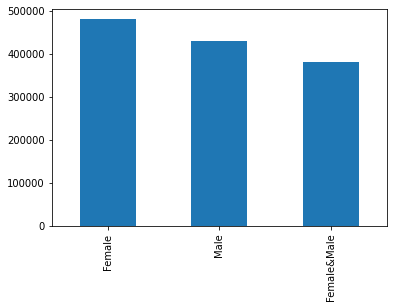

In [20]:
df["model_attr"].value_counts().plot.bar();

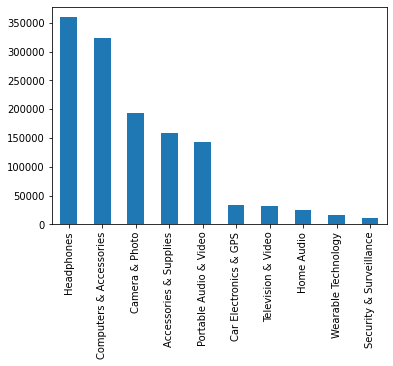

In [21]:
df["category"].value_counts().plot.bar();

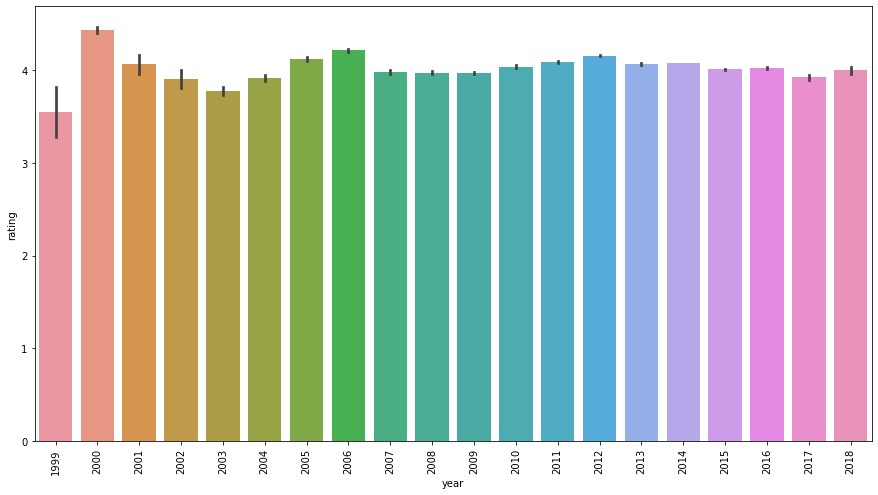

In [22]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.barplot(x="year",y="rating",data=df)
plt.show()

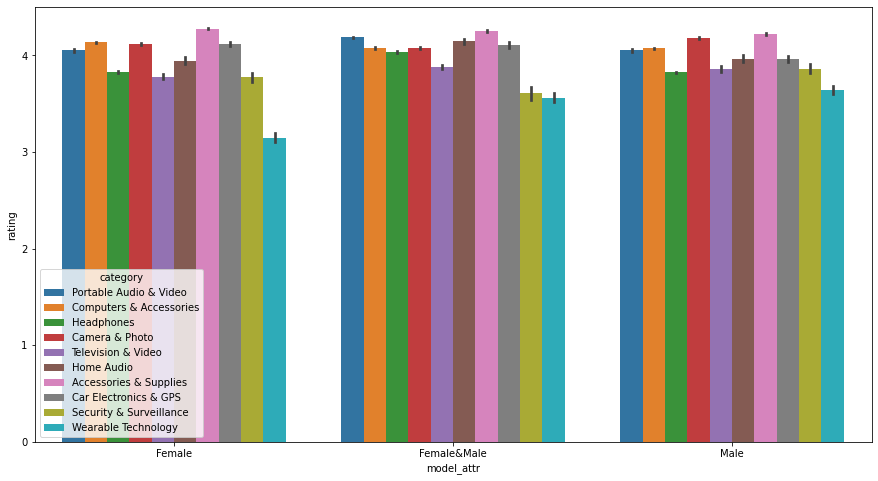

In [23]:
plt.figure(figsize = (15,8))
sns.barplot(x="model_attr",y="rating",hue="category",data=df);

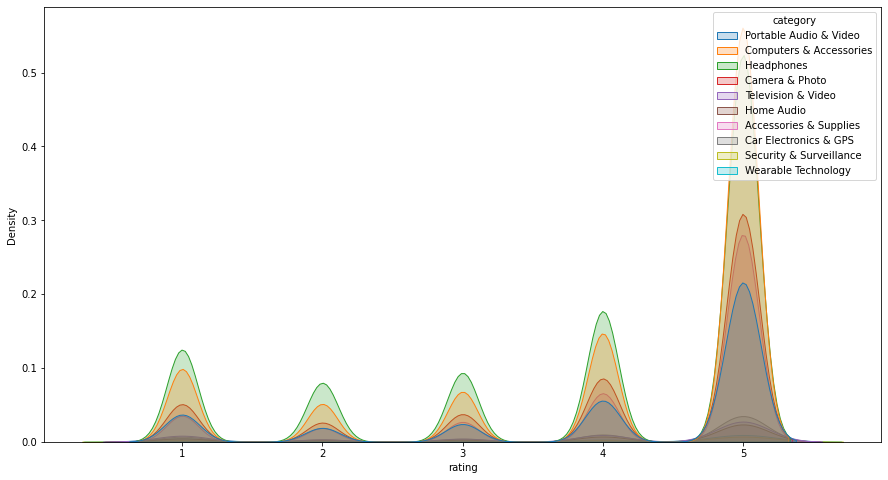

In [24]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df,x="rating",hue="category",shade=True);

<a id="7"></a>


# RECOMMENDATION SYSTEM

In [25]:
recommendation_df=df.loc[:,["userId","item_id","rating","category"]]

In [26]:
recommendation_df.head()

,userId,item_id,rating,category
0,70624,0,5.0,Portable Audio & Video
1,111335,0,5.0,Portable Audio & Video
2,117156,0,3.0,Portable Audio & Video
3,99479,0,1.0,Portable Audio & Video
4,10598,0,2.0,Portable Audio & Video


In [27]:
pivot_table=recommendation_df.pivot_table(index=["userId"],columns=["category"],values="rating")
pivot_table.head()

category,Accessories & Supplies,Camera & Photo,Car Electronics & GPS,Computers & Accessories,Headphones,Home Audio,Portable Audio & Video,Security & Surveillance,Television & Video,Wearable Technology
userId,,,,,,,,,,
1,5.0,NaN,NaN,4.0,4.600000,NaN,NaN,NaN,NaN,5.0
2,NaN,5.0,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN
3,5.0,5.0,NaN,3.0,4.142857,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,5.000000,NaN,NaN,NaN,NaN,NaN


In [28]:
ıfBuy=pivot_table["Headphones"]
canBuy=pivot_table.corrwith(ıfBuy)
canBuy=canBuy.sort_values(ascending=False)
canBuy.head(3)[1:3]

category
Security & Surveillance    0.019031
Camera & Photo             0.003164
dtype: float64